In [3]:
import csv
import pandas as pd
import os

import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

# Root Path
os.environ['ROOT'] = '/home/felipe/Ordens_servico/data/'
base_path = os.environ.get("ROOT")

In [1]:
year = 2021

In [2]:
# Raiz
! ls "${ROOT}"

ls: cannot access '': No such file or directory


# Municipios

In [4]:
# Coleta os dados de senso municios
municipios = pd.read_excel(base_path + "municipios.xlsx")
municipios

,Unnamed: 0,GEOCODIGO_MUNICIPIO,NOME_MUNICIPIO,LONGITUDE,LATITUDE,CodMun,UF,Cod UF,Mun,Pop estimada 2021,Faixa_pop,Regiao
0,0,1100015,ALTA FLORESTA D'OESTE,-61.999824,-11.935540,1100015,RO,11,Alta Floresta DOeste,22516,4 - 20001 até 50000,1 - Norte
1,1,1100023,ARIQUEMES,-63.033269,-9.908463,1100023,RO,11,Ariquemes,111148,6 - 100001 até 500000,1 - Norte
2,2,1100031,CABIXI,-60.544314,-13.499763,1100031,RO,11,Cabixi,5067,2 - 5001 até 10000,1 - Norte
3,3,1100049,CACOAL,-61.442944,-11.433865,1100049,RO,11,Cacoal,86416,5 - 50001 até 100000,1 - Norte
4,4,1100056,CEREJEIRAS,-60.818426,-13.195033,1100056,RO,11,Cerejeiras,16088,3 - 10001 até 20000,1 - Norte
...,...,...,...,...,...,...,...,...,...,...,...,...
5560,5560,5222005,VIANÓPOLIS,-48.513471,-16.742081,5222005,GO,52,Vianópolis,14088,3 - 10001 até 20000,5 - Centro-Oeste
5561,5561,5222054,VICENTINÓPOLIS,-49.807239,-17.732662,5222054,GO,52,Vicentinópolis,9002,2 - 5001 até 10000,5 - Centro-Oeste
5562,5562,5222203,VILA BOA,-47.057361,-15.034889,5222203,GO,52,Vila Boa,6451,2 - 5001 até 10000,5 - Centro-Oeste
5563,5563,5222302,VILA PROPÍCIO,-48.882422,-15.454635,5222302,GO,52,Vila Propício,5941,2 - 5001 até 10000,5 - Centro-Oeste


In [5]:
# Coleta os dados socieconomicos
municipios_pib = pd.read_excel(base_path + "/PIB dos Municípios - base de dados 2010-2020.xlsx")
municipios_pib = municipios_pib[municipios_pib["Ano"] == 2020]
municipios_pib["Nome do Município"] = municipios_pib["Nome do Município"].str.upper()

/home/felipe/miniconda3/lib/python3.10/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [6]:
municipios = municipios.merge(municipios_pib, left_on=["NOME_MUNICIPIO", "UF"], right_on=["Nome do Município", "Sigla da Unidade da Federação"], how='left')
municipios

,Unnamed: 0,GEOCODIGO_MUNICIPIO,NOME_MUNICIPIO,LONGITUDE,LATITUDE,CodMun,UF,Cod UF,Mun,Pop estimada 2021,Faixa_pop,Regiao,Ano,Código da Grande Região,Nome da Grande Região,Código da Unidade da Federação,Sigla da Unidade da Federação,Nome da Unidade da Federação,Código do Município,Nome do Município,Região Metropolitana,Código da Mesorregião,Nome da Mesorregião,Código da Microrregião,Nome da Microrregião,Código da Região Geográfica Imediata,Nome da Região Geográfica Imediata,Município da Região Geográfica Imediata,Código da Região Geográfica Intermediária,Nome da Região Geográfica Intermediária,Município da Região Geográfica Intermediária,Código Concentração Urbana,Nome Concentração Urbana,Tipo Concentração Urbana,Código Arranjo Populacional,Nome Arranjo Populacional,Hierarquia Urbana,Hierarquia Urbana (principais categorias),Código da Região Rural,Nome da Região Rural,Região rural (segundo classificação do núcleo),Amazônia Legal,Semiárido,Cidade-Região de São Paulo,"Valor adicionado bruto da Agropecuária, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto da Indústria,\na preços correntes\n(R$ 1.000)","Valor adicionado bruto dos Serviços,\na preços correntes \n- exceto Administração, defesa, educação e saúde públicas e seguridade social\n(R$ 1.000)","Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto total, \na preços correntes\n(R$ 1.000)","Impostos, líquidos de subsídios, sobre produtos, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)",Atividade com maior valor adicionado bruto,Atividade com segundo maior valor adicionado bruto,Atividade com terceiro maior valor adicionado bruto
0,0,1100015,ALTA FLORESTA D'OESTE,-61.999824,-11.935540,1100015,RO,11,Alta Floresta DOeste,22516,4 - 20001 até 50000,1 - Norte,2020.0,1.0,Norte,11.0,RO,Rondônia,1100015.0,ALTA FLORESTA D'OESTE,NaN,1102.0,Leste Rondoniense,11006.0,Cacoal,110005.0,Cacoal,do Entorno,1102.0,Ji-Paraná,do Entorno,NaN,NaN,NaN,NaN,NaN,Centro Local,Centro Local,1101.0,Região Rural da Capital Regional de Porto Velho,Região Rural de Capital Regional,Sim,Não,Não,203394.419,2.071640e+04,1.501924e+05,1.608596e+05,5.351629e+05,3.510944e+04,5.702723e+05,25091.18,"Administração, defesa, educação e saúde públic...","Pecuária, inclusive apoio à pecuária",Demais serviços
1,1,1100023,ARIQUEMES,-63.033269,-9.908463,1100023,RO,11,Ariquemes,111148,6 - 100001 até 500000,1 - Norte,2020.0,1.0,Norte,11.0,RO,Rondônia,1100023.0,ARIQUEMES,NaN,1102.0,Leste Rondoniense,11003.0,Ariquemes,110002.0,Ariquemes,Polo,1101.0,Porto Velho,do Entorno,NaN,NaN,NaN,NaN,NaN,Centro Sub-regional B,Centro Sub-regional,1101.0,Região Rural da Capital Regional de Porto Velho,Região Rural de Capital Regional,Sim,Não,Não,199722.710,4.047518e+05,1.207405e+06,7.105134e+05,2.522393e+06,2.956557e+05,2.818049e+06,25730.20,Demais serviços,"Administração, defesa, educação e saúde públic...",Comércio e reparação de veículos automotores e...
2,2,1100031,CABIXI,-60.544314,-13.499763,1100031,RO,11,Cabixi,5067,2 - 5001 até 10000,1 - Norte,2020.0,1.0,Norte,11.0,RO,Rondônia,1100031.0,CABIXI,NaN,1102.0,Leste Rondoniense,11008.0,Colorado do Oeste,110006.0,Vilhena,do Entorno,1102.0,Ji-Paraná,do Entorno,NaN,NaN,NaN,NaN,NaN,Centro Local,Centro Local,1101.0,Região Rural da Capital Regional de Porto Velho,Região Rural de Capital Regional,Sim,Não,Não,81177.101,5.438033e+03,2.866697e+04,4.467107e+04,1.599532e+05,7.236636e+03,1.671898e+05,32226.25,"Administração, defesa, educação e saúde públic...","Pecuária, inclusive apoio à pecuária","Agricultura, inclusive apoio à agricultura e a..."
3,3,1100049,CACOAL,-61.442944,-11.433865,1100049,RO,11,Cacoal,86416,5 - 50001 até 100000,1 - Norte,2020.0,1.0,Norte,11.0,RO,Rondônia,1100049.0,CACOAL,NaN,1102.0,Leste Rondoniense,11006.0,Cacoal,110005.0,Cacoal,Polo,1102.0,Ji-Paraná,do Entorno,Na

In [8]:
# Coleta os dados de cidades Litoraneas
municipios_litoraneos = pd.read_excel(base_path + "Municipios_Defrontantes_com_o_Mar_2021.xlsx")
municipios_litoraneos["NM_MUN"] = municipios_litoraneos["NM_MUN"].str.upper()
municipios_litoraneos["FLAG_LIT"] = 1

In [9]:
municipios = municipios.merge(municipios_litoraneos, left_on=["NOME_MUNICIPIO", "UF"], right_on=["NM_MUN", "SIGLA"], how='left')
municipios["FLAG_LIT"] = municipios["FLAG_LIT"].fillna(0)
municipios

,Unnamed: 0,GEOCODIGO_MUNICIPIO,NOME_MUNICIPIO,LONGITUDE,LATITUDE,CodMun,UF,Cod UF,Mun,Pop estimada 2021,Faixa_pop,Regiao,Ano,Código da Grande Região,Nome da Grande Região,Código da Unidade da Federação,Sigla da Unidade da Federação,Nome da Unidade da Federação,Código do Município,Nome do Município,Região Metropolitana,Código da Mesorregião,Nome da Mesorregião,Código da Microrregião,Nome da Microrregião,Código da Região Geográfica Imediata,Nome da Região Geográfica Imediata,Município da Região Geográfica Imediata,Código da Região Geográfica Intermediária,Nome da Região Geográfica Intermediária,Município da Região Geográfica Intermediária,Código Concentração Urbana,Nome Concentração Urbana,Tipo Concentração Urbana,Código Arranjo Populacional,Nome Arranjo Populacional,Hierarquia Urbana,Hierarquia Urbana (principais categorias),Código da Região Rural,Nome da Região Rural,Região rural (segundo classificação do núcleo),Amazônia Legal,Semiárido,Cidade-Região de São Paulo,"Valor adicionado bruto da Agropecuária, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto da Indústria,\na preços correntes\n(R$ 1.000)","Valor adicionado bruto dos Serviços,\na preços correntes \n- exceto Administração, defesa, educação e saúde públicas e seguridade social\n(R$ 1.000)","Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto total, \na preços correntes\n(R$ 1.000)","Impostos, líquidos de subsídios, sobre produtos, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)",Atividade com maior valor adicionado bruto,Atividade com segundo maior valor adicionado bruto,Atividade com terceiro maior valor adicionado bruto,NM_REGIAO,CD_UF,NM_UF,SIGLA,CD_MUN,NM_MUN,AREA_KM2,LAT_SEDE,LNG_SEDE,FLAG_LIT
0,0,1100015,ALTA FLORESTA D'OESTE,-61.999824,-11.935540,1100015,RO,11,Alta Floresta DOeste,22516,4 - 20001 até 50000,1 - Norte,2020.0,1.0,Norte,11.0,RO,Rondônia,1100015.0,ALTA FLORESTA D'OESTE,NaN,1102.0,Leste Rondoniense,11006.0,Cacoal,110005.0,Cacoal,do Entorno,1102.0,Ji-Paraná,do Entorno,NaN,NaN,NaN,NaN,NaN,Centro Local,Centro Local,1101.0,Região Rural da Capital Regional de Porto Velho,Região Rural de Capital Regional,Sim,Não,Não,203394.419,2.071640e+04,1.501924e+05,1.608596e+05,5.351629e+05,3.510944e+04,5.702723e+05,25091.18,"Administração, defesa, educação e saúde públic...","Pecuária, inclusive apoio à pecuária",Demais serviços,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,1,1100023,ARIQUEMES,-63.033269,-9.908463,1100023,RO,11,Ariquemes,111148,6 - 100001 até 500000,1 - Norte,2020.0,1.0,Norte,11.0,RO,Rondônia,1100023.0,ARIQUEMES,NaN,1102.0,Leste Rondoniense,11003.0,Ariquemes,110002.0,Ariquemes,Polo,1101.0,Porto Velho,do Entorno,NaN,NaN,NaN,NaN,NaN,Centro Sub-regional B,Centro Sub-regional,1101.0,Região Rural da Capital Regional de Porto Velho,Região Rural de Capital Regional,Sim,Não,Não,199722.710,4.047518e+05,1.207405e+06,7.105134e+05,2.522393e+06,2.956557e+05,2.818049e+06,25730.20,Demais serviços,"Administração, defesa, educação e saúde públic...",Comércio e reparação de veículos automotores e...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2,1100031,CABIXI,-60.544314,-13.499763,1100031,RO,11,Cabixi,5067,2 - 5001 até 10000,1 - Norte,2020.0,1.0,Norte,11.0,RO,Rondônia,1100031.0,CABIXI,NaN,1102.0,Leste Rondoniense,11008.0,Colorado do Oeste,110006.0,Vilhena,do Entorno,1102.0,Ji-Paraná,do Entorno,NaN,NaN,NaN,NaN,NaN,Centro Local,Centro Local,1101.0,Região Rural da Capital Regional de Porto Velho,Região Rural de Capital Regional,Sim,Não,Não,81177.101,5.438033e+03,2.866697e+04,4.467107e+04,1.599532e+05,7.236636e+03,1.671898e+05,32226.25,"Administração, defesa, educação e saúde públic...","Pecuária, inclusive apoio à pecuária","Agricultura, inclusive apoio à agricultura e a...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,3,1100049,CACOAL,-61.442944,-11.433865,110004

In [10]:
municipios = municipios[["GEOCODIGO_MUNICIPIO", "NOME_MUNICIPIO", "LONGITUDE", "LATITUDE", "CodMun", "Mun","UF", "Pop estimada 2021", "Faixa_pop", "Região Metropolitana", 
                         "Regiao", "Nome da Grande Região", "Nome da Mesorregião", "Nome da Microrregião", "Nome da Região Geográfica Imediata","Município da Região Geográfica Imediata", 
                         "Nome da Região Geográfica Intermediária", "Município da Região Geográfica Intermediária", "Nome Concentração Urbana", "Tipo Concentração Urbana",
                         "Nome Arranjo Populacional", "Hierarquia Urbana", "Hierarquia Urbana (principais categorias)", "Nome da Região Rural", "Região rural (segundo classificação do núcleo)",
                         "Amazônia Legal", "Semiárido", "Cidade-Região de São Paulo", "Valor adicionado bruto total, \na preços correntes\n(R$ 1.000)",
                      "Impostos, líquidos de subsídios, sobre produtos, \na preços correntes\n(R$ 1.000)", "Produto Interno Bruto, \na preços correntes\n(R$ 1.000)", 
                      "Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)", "FLAG_LIT"]]

# meteorologia

In [11]:
meteorologia = pd.read_csv(base_path + "/meteorologia_{}.csv".format(year))
meteorologia = meteorologia[[
    "Data" , "uf", "municipio",
    "PRECIPITAÇÃO TOTAL, HORÁRIO (mm)", "RADIACAO GLOBAL (Kj/m²)", "TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",  
    "TEMPERATURA DO PONTO DE ORVALHO (°C)", "UMIDADE RELATIVA DO AR, HORARIA (%)", 
    "VENTO, DIREÇÃO HORARIA (gr) (° (gr))", 
    "VENTO, RAJADA MAXIMA (m/s)", "VENTO, VELOCIDADE HORARIA (m/s)", 
    
]]

array([[<Axes: title={'center': 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'}>,
        <Axes: title={'center': 'RADIACAO GLOBAL (Kj/m²)'}>,
        <Axes: title={'center': 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'}>],
       [<Axes: title={'center': 'TEMPERATURA DO PONTO DE ORVALHO (°C)'}>,
        <Axes: title={'center': 'UMIDADE RELATIVA DO AR, HORARIA (%)'}>,
        <Axes: title={'center': 'VENTO, DIREÇÃO HORARIA (gr) (° (gr))'}>],
       [<Axes: title={'center': 'VENTO, RAJADA MAXIMA (m/s)'}>,
        <Axes: title={'center': 'VENTO, VELOCIDADE HORARIA (m/s)'}>,
        <Axes: >]], dtype=object)

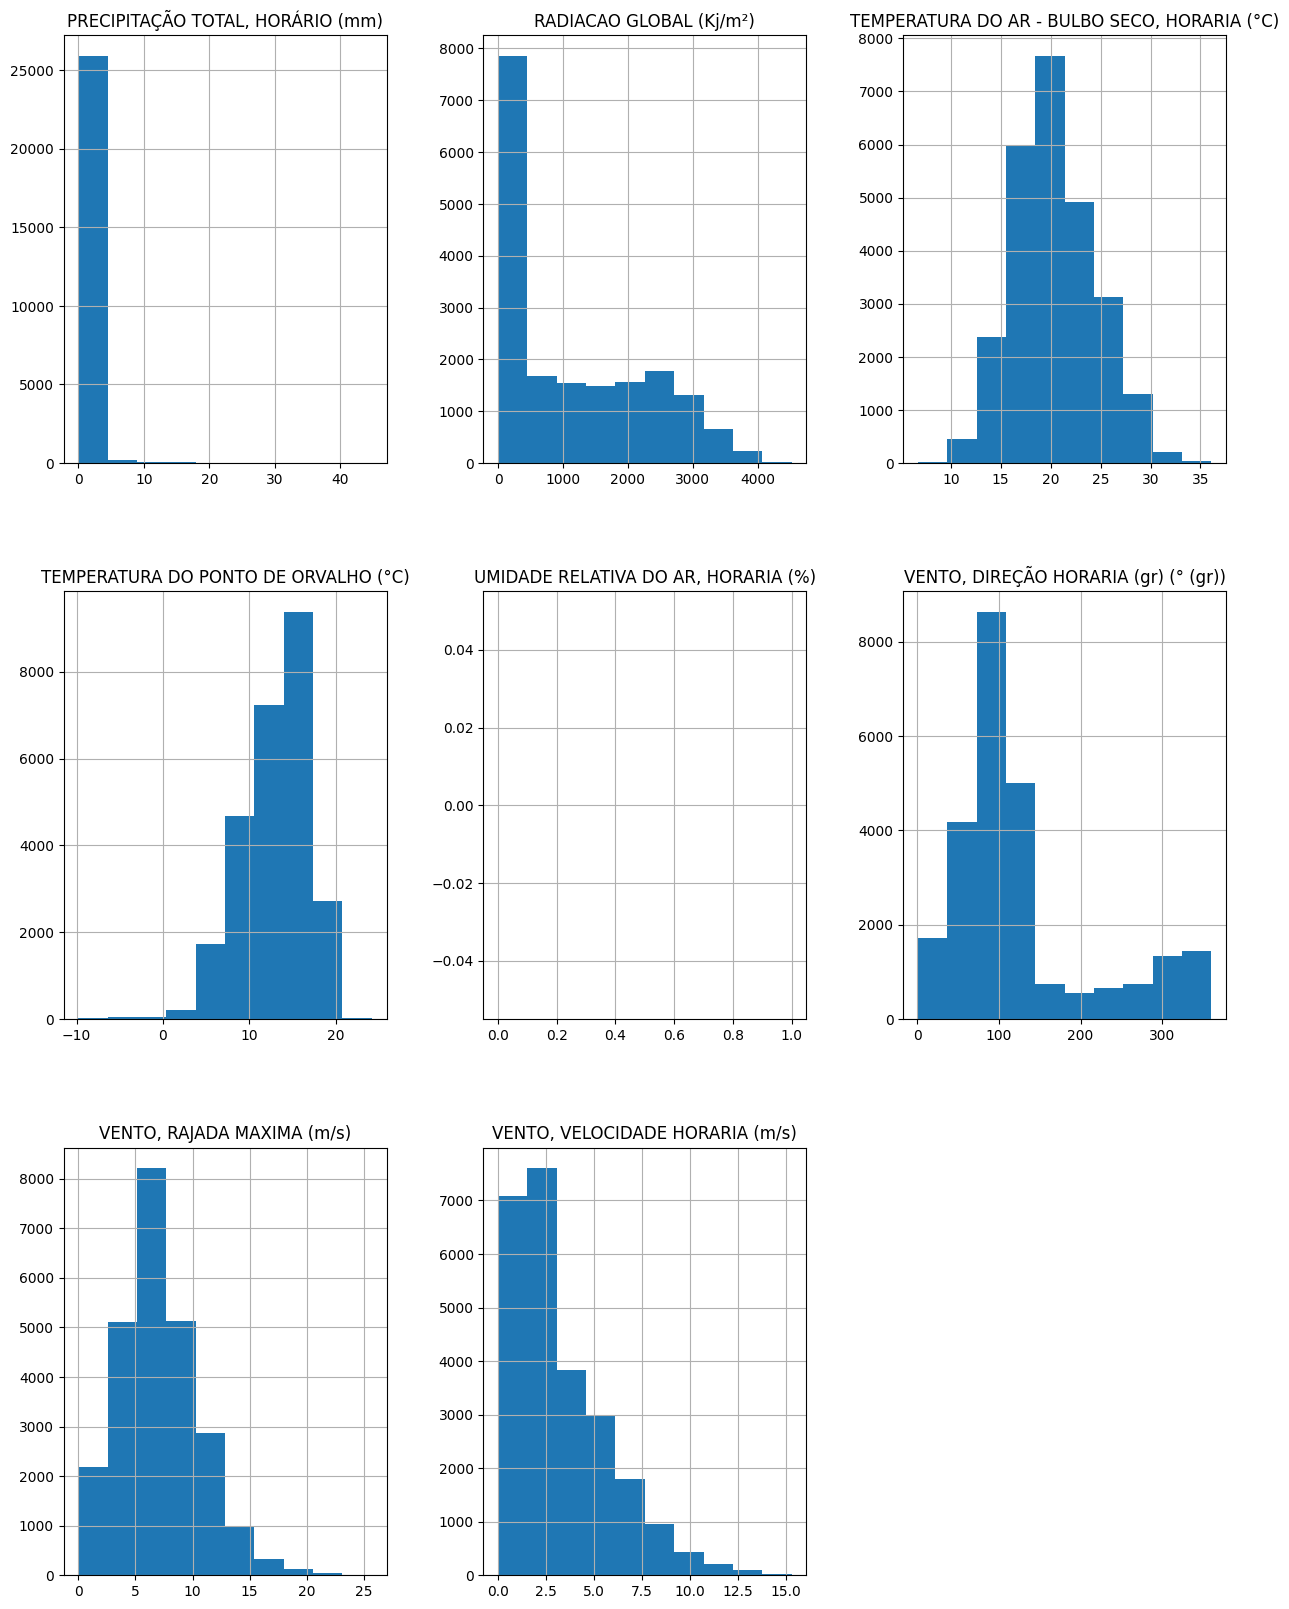

In [12]:
# Histograma para acompanhar os dados diarios. Eh necessario plotar o histograma para analise da dispersao e de dados atipicos
meteorologia[meteorologia.municipio == "Belo Horizonte"].hist(figsize = (15,20))

In [13]:
meteorologia["mes"] = pd.to_datetime(meteorologia["Data"]).dt.month
meteorologia["year"] = pd.to_datetime(meteorologia["Data"]).dt.year

In [14]:
# Features - Pega-se a temperatura, umidade, velocidade do vento, precipitacao e radiacao maxima e media , e a precipitacao e radiacao total

meteorologia_max = meteorologia.groupby(["year", "uf" ,"municipio", "mes"])[
    "TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)", "TEMPERATURA DO PONTO DE ORVALHO (°C)", "UMIDADE RELATIVA DO AR, HORARIA (%)", "VENTO, DIREÇÃO HORARIA (gr) (° (gr))",
    "VENTO, RAJADA MAXIMA (m/s)", "VENTO, VELOCIDADE HORARIA (m/s)", "PRECIPITAÇÃO TOTAL, HORÁRIO (mm)", "RADIACAO GLOBAL (Kj/m²)"
    ].max()
meteorologia_max.columns = 'MAX_' + meteorologia_max.columns

meteorologia_media = meteorologia.groupby(["year", "uf", "municipio", "mes"])[
    "TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)", "TEMPERATURA DO PONTO DE ORVALHO (°C)", "UMIDADE RELATIVA DO AR, HORARIA (%)", "VENTO, DIREÇÃO HORARIA (gr) (° (gr))",
    "VENTO, RAJADA MAXIMA (m/s)", "VENTO, VELOCIDADE HORARIA (m/s)","PRECIPITAÇÃO TOTAL, HORÁRIO (mm)", "RADIACAO GLOBAL (Kj/m²)"
    ].mean()
meteorologia_media.columns = 'MED_' + meteorologia_media.columns

meteorologia_tot= meteorologia.groupby(["year", "uf", "municipio", "mes"])["PRECIPITAÇÃO TOTAL, HORÁRIO (mm)", "RADIACAO GLOBAL (Kj/m²)"].sum()
meteorologia_tot.columns = 'TOTAL_' + meteorologia_tot.columns

/tmp/ipykernel_117820/670972063.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  meteorologia_max = meteorologia.groupby(["year", "uf" ,"municipio", "mes"])[
/tmp/ipykernel_117820/670972063.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  meteorologia_media = meteorologia.groupby(["year", "uf", "municipio", "mes"])[
/tmp/ipykernel_117820/670972063.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  meteorologia_tot= meteorologia.groupby(["year", "uf", "municipio", "mes"])["PRECIPITAÇÃO TOTAL, HORÁRIO (mm)", "RADIACAO GLOBAL (Kj/m²)"].sum()


In [15]:
meteorologia_res = meteorologia_max.join(meteorologia_media)
meteorologia_res = meteorologia_res.join(meteorologia_tot).reset_index()

In [16]:
meteorologia_res['municipio'] = meteorologia_res.municipio.str.upper()

In [17]:
meteorologia_res

,year,uf,municipio,mes,"MAX_TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",MAX_TEMPERATURA DO PONTO DE ORVALHO (°C),"MAX_UMIDADE RELATIVA DO AR, HORARIA (%)","MAX_VENTO, DIREÇÃO HORARIA (gr) (° (gr))","MAX_VENTO, RAJADA MAXIMA (m/s)","MAX_VENTO, VELOCIDADE HORARIA (m/s)","MAX_PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",MAX_RADIACAO GLOBAL (Kj/m²),"MED_TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",MED_TEMPERATURA DO PONTO DE ORVALHO (°C),"MED_UMIDADE RELATIVA DO AR, HORARIA (%)","MED_VENTO, DIREÇÃO HORARIA (gr) (° (gr))","MED_VENTO, RAJADA MAXIMA (m/s)","MED_VENTO, VELOCIDADE HORARIA (m/s)","MED_PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",MED_RADIACAO GLOBAL (Kj/m²),"TOTAL_PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",TOTAL_RADIACAO GLOBAL (Kj/m²)
0,2021,AC,BUJARI,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,2021,AC,BUJARI,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2021,AC,BUJARI,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,2021,AC,BUJARI,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,2021,AC,BUJARI,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6055,2021,TO,PEIXE,8,38.4,14.1,NaN,164.0,0.0,0.0,0.0,3603.9,32.661417,9.718110,NaN,98.834646,0.000000,0.000000,0.000000,2383.672441,0.0,302726.4
6056,2021,TO,PEIXE,9,40.1,22.6,NaN,360.0,20.2,7.5,8.0,3565.7,29.260438,14.804882,NaN,169.355219,4.150000,1.608923,0.034680,1826.392994,20.6,573487.4
6057,2021,TO,PEIXE,10,37.9,24.6,NaN,360.0,22.1,5.0,25.0,3902.8,27.727793,20.414804,NaN,174.191341,4.038687,1.577514,0.136313,1526.848737,97.6,604632.1
6058,2021,TO,PEIXE,11,35.0,24.4,NaN,360.0,13.7,5.3,23.8,4146.7,25.886087,21.861304,NaN,177.471698,3.815239,1.471988,0.353556,1278.140342,243.6,522759.4


In [18]:
# incluir o estado na base de meteorologia e no join (por exemplo palmas existe como municipio de dois estados e esta trazendo dados duplicados)
base = municipios.merge(meteorologia_res, left_on=["UF", "NOME_MUNICIPIO"], right_on=["uf", "municipio"], how='inner')

In [19]:
base

,GEOCODIGO_MUNICIPIO,NOME_MUNICIPIO,LONGITUDE,LATITUDE,CodMun,Mun,UF,Pop estimada 2021,Faixa_pop,Região Metropolitana,Regiao,Nome da Grande Região,Nome da Mesorregião,Nome da Microrregião,Nome da Região Geográfica Imediata,Município da Região Geográfica Imediata,Nome da Região Geográfica Intermediária,Município da Região Geográfica Intermediária,Nome Concentração Urbana,Tipo Concentração Urbana,Nome Arranjo Populacional,Hierarquia Urbana,Hierarquia Urbana (principais categorias),Nome da Região Rural,Região rural (segundo classificação do núcleo),Amazônia Legal,Semiárido,Cidade-Região de São Paulo,"Valor adicionado bruto total, \na preços correntes\n(R$ 1.000)","Impostos, líquidos de subsídios, sobre produtos, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)",FLAG_LIT,year,uf,municipio,mes,"MAX_TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",MAX_TEMPERATURA DO PONTO DE ORVALHO (°C),"MAX_UMIDADE RELATIVA DO AR, HORARIA (%)","MAX_VENTO, DIREÇÃO HORARIA (gr) (° (gr))","MAX_VENTO, RAJADA MAXIMA (m/s)","MAX_VENTO, VELOCIDADE HORARIA (m/s)","MAX_PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",MAX_RADIACAO GLOBAL (Kj/m²),"MED_TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",MED_TEMPERATURA DO PONTO DE ORVALHO (°C),"MED_UMIDADE RELATIVA DO AR, HORARIA (%)","MED_VENTO, DIREÇÃO HORARIA (gr) (° (gr))","MED_VENTO, RAJADA MAXIMA (m/s)","MED_VENTO, VELOCIDADE HORARIA (m/s)","MED_PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",MED_RADIACAO GLOBAL (Kj/m²),"TOTAL_PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",TOTAL_RADIACAO GLOBAL (Kj/m²)
0,1100023,ARIQUEMES,-63.033269,-9.908463,1100023,Ariquemes,RO,111148,6 - 100001 até 500000,NaN,1 - Norte,Norte,Leste Rondoniense,Ariquemes,Ariquemes,Polo,Porto Velho,do Entorno,NaN,NaN,NaN,Centro Sub-regional B,Centro Sub-regional,Região Rural da Capital Regional de Porto Velho,Região Rural de Capital Regional,Sim,Não,Não,2522392.943,295655.675,2818048.618,25730.2,0.0,2021,RO,ARIQUEMES,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,1100023,ARIQUEMES,-63.033269,-9.908463,1100023,Ariquemes,RO,111148,6 - 100001 até 500000,NaN,1 - Norte,Norte,Leste Rondoniense,Ariquemes,Ariquemes,Polo,Porto Velho,do Entorno,NaN,NaN,NaN,Centro Sub-regional B,Centro Sub-regional,Região Rural da Capital Regional de Porto Velho,Região Rural de Capital Regional,Sim,Não,Não,2522392.943,295655.675,2818048.618,25730.2,0.0,2021,RO,ARIQUEMES,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,1100023,ARIQUEMES,-63.033269,-9.908463,1100023,Ariquemes,RO,111148,6 - 100001 até 500000,NaN,1 - Norte,Norte,Leste Rondoniense,Ariquemes,Ariquemes,Polo,Porto Velho,do Entorno,NaN,NaN,NaN,Centro Sub-regional B,Centro Sub-regional,Região Rural da Capital Regional de Porto Velho,Região Rural de Capital Regional,Sim,Não,Não,2522392.943,295655.675,2818048.618,25730.2,0.0,2021,RO,ARIQUEMES,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,1100023,ARIQUEMES,-63.033269,-9.908463,1100023,Ariquemes,RO,111148,6 - 100001 até 500000,NaN,1 - Norte,Norte,Leste Rondoniense,Ariquemes,Ariquemes,Polo,Porto Velho,do Entorno,NaN,NaN,NaN,Centro Sub-regional B,Centro Sub-regional,Região Rural da Capital Regional de Porto Velho,Região Rural de Capital Regional,Sim,Não,Não,2522392.943,295655.675,2818048.618,25730.2,0.0,2021,RO,ARIQUEMES,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,1100023,ARIQUEMES,-63.033269,-9.908463,1100023,Ariquemes,RO,111148,6 - 100001 até 500000,NaN,1 - Norte,Norte,Leste Rondoniense,Ariquemes,Ariquemes,Polo,Porto Velho,do Entorno,NaN,NaN,NaN,Centro Sub-regional B,Centro Sub-regional,Região Rural da Capital Regional de Porto Velho,Região Rural de Capital Regional,Sim,Não,Não,2522392.943,295655.675,2818048.618,25730.2,0.0,2021,RO,ARIQUEMES,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [20]:
base.to_excel(base_path + "/base_{}.xlsx".format(year))

# Interrupcoes

In [4]:
base = pd.read_excel(base_path + "/base_{}.xlsx".format(year))

# Dados de Interrupcoes Rede
# Old dir
# interrupcoes = pd.read_csv("/content/drive/MyDrive/Mestrado/Ordens_servico/Ordens_servico/interrupcoes_{}.csv".format(year))
# New dir
interrupcoes = pd.read_csv(base_path + "/test_interrupcoes_collect_ckan_{}.csv".format(year))

/tmp/ipykernel_1578/543920822.py:7: DtypeWarning: Columns (5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interrupcoes = pd.read_csv(base_path + "/test_interrupcoes_collect_ckan_{}.csv".format(year))


In [5]:
interrupcoes

,Unnamed: 0.1,Unnamed: 0,_id,DatGeracaoConjuntoDados,DscConjuntoUnidadeConsumidora,DscAlimentadorSubestacao,DscSubestacaoDistribuicao,NumOrdemInterrupcao,DscTipoInterrupcao,IdeMotivoInterrupcao,DatInicioInterrupcao,DatFimInterrupcao,DscFatoGeradorInterrupcao,NumNivelTensao,NumUnidadeConsumidora,NumConsumidorConjunto,NumAno,NomAgenteRegulado,SigAgente,NumCPFCNPJ
0,0,0,1,2023-05-26,Cruzeiro do Sul,USCDS-003,USCDS,2021-1,Não Programada,0,2021-01-01 00:50:00,2021-01-01 03:25:59,INTERNA - NAO PROGRAMADA - PROPRIAS DO SISTEMA...,13800,687,38447,2021,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,ELETROACRE,4065033000170
1,1,1,2,2023-05-26,Cruzeiro do Sul,USCDS-003,USCDS,2021-1,Não Programada,0,2021-01-01 00:50:00,2021-01-01 03:10:59,INTERNA - NAO PROGRAMADA - PROPRIAS DO SISTEMA...,13800,1,38447,2021,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,ELETROACRE,4065033000170
2,2,2,3,2023-05-26,Cruzeiro do Sul,USCDS-005,USCDS,2021-1,Não Programada,0,2021-01-01 00:50:00,2021-01-01 03:25:59,INTERNA - NAO PROGRAMADA - PROPRIAS DO SISTEMA...,13800,1,38447,2021,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,ELETROACRE,4065033000170
3,3,3,4,2023-05-26,Cruzeiro do Sul,USCDS-003,USCDS,2021-1,Não Programada,0,2021-01-01 00:50:00,2021-01-01 03:35:59,INTERNA - NAO PROGRAMADA - PROPRIAS DO SISTEMA...,13800,241,38447,2021,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,ELETROACRE,4065033000170
4,4,4,5,2023-05-26,Epitaciolândia,SEAB-01C1,SEAB,2020-178838,Não Programada,0,2021-01-01 00:56:18,2021-01-01 01:40:59,INTERNA - NAO PROGRAMADA - PROPRIAS DO SISTEMA...,13800,355,24626,2021,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,ELETROACRE,4065033000170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7810662,790662,790662,7810663,2023-05-26,PURUS E MADEIRA,AAPDJ2-01,AUTE AU,98880,Não Programada,0,2021-12-31 23:42:47,2021-12-31 23:47:47,Interna - Não Programada - Meio ambiente - Árv...,13000,43,66917,2021,Amazonas Energia S.A.,AME,2341467000120
7810663,790663,790663,7810664,2023-05-26,ALTO SOLIMÕES,ATBDJ2-02,APIE TB,98880,Não Programada,0,2021-12-31 23:42:47,2021-12-31 23:47:47,Interna - Não Programada - Meio ambiente - Árv...,13000,133,37523,2021,Amazonas Energia S.A.,AME,2341467000120
7810664,790664,790664,7810665,2023-05-26,SANTO ANTÔNIO,ASODJ2-04,ASE SO,98880,Não Programada,0,2021-12-31 23:42:47,2021-12-31 23:47:47,Interna - Não Programada - Meio ambiente - Árv...,13000,3,74208,2021,Amazonas Energia S.A.,AME,2341467000120
7810665,790665,790665,7810666,2023-05-26,MÉDIO SOLIMÕES E JURUÁ,ACZDJ2-01,A5003237,98880,Não Programada,0,2021-12-31 23:42:47,2021-12-31 23:47:47,Interna - Não Programada - Meio ambiente - Árv...,13000,594,87908,2021,Amazonas Energia S.A.,AME,2341467000120


In [6]:
interrupcoes["FLAG_INTERRUPCOES"] = 1

In [7]:
# Inclui od dados de municipios nos dados de interrupcoes.
# A partir de 2022 o nome da coluna na base de dados modifica . Dessa forma eh verifico qual o ano antes processamento
col = "DatInicioInterrupcao"

interrupcoes["mes"] = pd.to_datetime(interrupcoes[col]).dt.month
interrupcoes["year"] = pd.to_datetime(interrupcoes[col]).dt.year

In [8]:
# De-para de unidade consumidora e municipio

dpara_munic = pd.read_csv(base_path + "/indqual-municipio.csv", encoding="ISO-8859-1", sep=';')
dpara_unid = pd.read_csv(base_path + "/de_para_und_cons.csv", encoding="ISO-8859-1", sep=',')

In [9]:
# Faz o merge left porque a dimensao de unidade consumidoras foi tirada da base de dec e fec, com um processamento realizando o drop duplicates para o ano de 2021. Dessa so existem dados das unidades com indicador. No teste com a base de interrupcoes de 2021 todos
# os registros estavam incluidos
print("quantidade de dados na dimensao de unidadescons",dpara_unid.shape[0])
dpara_munic = dpara_munic.merge(dpara_unid[["IdeConjUndConsumidoras", "DscConjUndConsumidoras"]], left_on="IdeConjUnidConsumidoras" ,right_on="IdeConjUndConsumidoras", how="left")

quantidade de dados na dimensao de unidadescons 3387


In [10]:
# Divide a base em chunks para fazer o merge, por problemas de memoria


interrupcoes.to_csv(base_path + "/test_interrupcoes_collect_ckan_{}_temp.csv".format(year))

# Define chuncksize as the len of the base / 8 
chuncksize = int((interrupcoes.shape[0]) / 8)
del interrupcoes


reader = pd.read_csv(base_path + "/test_interrupcoes_collect_ckan_{}_temp.csv".format(year), chunksize=chuncksize)

def merge_prep(x, left_col, col):
    temp_df = x.merge(dpara_munic, left_on=left_col, right_on=col)
    return temp_df

ValueError: 'chunksize' must be an integer >=1

In [15]:
if year >= 2022:
  left_col = "DscCnjUndCnm"
  col = "DscConjUndConsumidoras"
else:
  left_col = "DscConjuntoUnidadeConsumidora"
  col = "DscConjUndConsumidoras"

df = pd.DataFrame({})
for i, x in enumerate(reader):
    print(i)
    temp_df = merge_prep(x, left_col, col)
    df = df.append(temp_df)

/tmp/ipykernel_1578/624963074.py:9: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, x in enumerate(reader):


0


/tmp/ipykernel_1578/624963074.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)


1


: 

: 

In [13]:
# Inclui od dados de municipios nos dados de interrupcoes.
# A partir de 2022 o nome da coluna na base de dados modifica . Dessa forma eh verifico qual o ano antes processamento
if year >= 2022:
  left_col = "DscCnjUndCnm"
  col = "DscConjUndConsumidoras"
else:
  left_col = "DscConjuntoUnidadeConsumidora"
  col = "DscConjUndConsumidoras"
interrupcoes_1 = interrupcoes_1.merge(dpara_munic, left_on=left_col, right_on=col)
# interrupcoes_2 = interrupcoes_2.merge(dpara_munic, left_on=left_col, right_on=col)

: 

: 

In [ ]:
interrupcoes = interrupcoes_1.append(interrupcoes_2)

In [ ]:
dpara_munic[dpara_munic.DscConjUndConsumidoras == "PINHALZINHO"]

In [ ]:
# A partir de 2022 o nome da coluna na base de dados modifica . Dessa forma verifica o ano e muda o nome das colunas para a base final
if year >= 2022:
  interrupcoes.rename(columns={"NumCons":"NUMERO_UNIDADES_CONSUMIDORAS", "NumCOnsCjt": "NUMERO_CONSUMIDORES_DO_CONJUNTO"}, inplace= True) # Inplace make the changes permanent
                                                     
else:
  interrupcoes.rename(columns={"NumUnidadeConsumidora":"NUMERO_UNIDADES_CONSUMIDORAS", "NumConsumidorConjunto": "NUMERO_CONSUMIDORES_DO_CONJUNTO"}, inplace=True)

In [ ]:
# Agrupamento das interrupcoes contando a quantidade
interrupcoes = interrupcoes.groupby(["year", "mes", "SigUF","NomMunicipio"])[["NUMERO_UNIDADES_CONSUMIDORAS", "NUMERO_CONSUMIDORES_DO_CONJUNTO", "FLAG_INTERRUPCOES"]].sum()

In [ ]:
interrupcoes = interrupcoes.reset_index()

In [ ]:
interrupcoes

In [ ]:
interrupcoes['NomMunicipio'] = interrupcoes.NomMunicipio.str.upper()

In [ ]:
base_res = base.merge(interrupcoes, left_on=["year", "mes", "NOME_MUNICIPIO", "uf"], right_on=["year", "mes",  "NomMunicipio", "SigUF"])

In [ ]:
base_res

,Unnamed: 0,GEOCODIGO_MUNICIPIO,NOME_MUNICIPIO,LONGITUDE,LATITUDE,CodMun,Mun,UF,Pop estimada 2021,Faixa_pop,Região Metropolitana,Regiao,Nome da Grande Região,Nome da Mesorregião,Nome da Microrregião,Nome da Região Geográfica Imediata,Município da Região Geográfica Imediata,Nome da Região Geográfica Intermediária,Município da Região Geográfica Intermediária,Nome Concentração Urbana,Tipo Concentração Urbana,Nome Arranjo Populacional,Hierarquia Urbana,Hierarquia Urbana (principais categorias),Nome da Região Rural,Região rural (segundo classificação do núcleo),Amazônia Legal,Semiárido,Cidade-Região de São Paulo,"Valor adicionado bruto total, \na preços correntes\n(R$ 1.000)","Impostos, líquidos de subsídios, sobre produtos, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)",FLAG_LIT,year,uf,municipio,mes,"MAX_TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",MAX_TEMPERATURA DO PONTO DE ORVALHO (°C),"MAX_UMIDADE RELATIVA DO AR, HORARIA (%)","MAX_VENTO, DIREÇÃO HORARIA (gr) (° (gr))","MAX_VENTO, RAJADA MAXIMA (m/s)","MAX_VENTO, VELOCIDADE HORARIA (m/s)","MAX_PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",MAX_RADIACAO GLOBAL (Kj/m²),"MED_TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",MED_TEMPERATURA DO PONTO DE ORVALHO (°C),"MED_UMIDADE RELATIVA DO AR, HORARIA (%)","MED_VENTO, DIREÇÃO HORARIA (gr) (° (gr))","MED_VENTO, RAJADA MAXIMA (m/s)","MED_VENTO, VELOCIDADE HORARIA (m/s)","MED_PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",MED_RADIACAO GLOBAL (Kj/m²),"TOTAL_PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",TOTAL_RADIACAO GLOBAL (Kj/m²),SigUF,NomMunicipio,NUMERO_UNIDADES_CONSUMIDORAS,NUMERO_CONSUMIDORES_DO_CONJUNTO,FLAG_INTERRUPCOES
0,0,1100023,ARIQUEMES,-63.033269,-9.908463,1100023,Ariquemes,RO,111148,6 - 100001 até 500000,NaN,1 - Norte,Norte,Leste Rondoniense,Ariquemes,Ariquemes,Polo,Porto Velho,do Entorno,NaN,NaN,NaN,Centro Sub-regional B,Centro Sub-regional,Região Rural da Capital Regional de Porto Velho,Região Rural de Capital Regional,Sim,Não,Não,2522392.943,295655.675,2818048.618,25730.20,0,2022,RO,ARIQUEMES,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,RO,ARIQUEMES,82619,98883150,1619
1,1,1100023,ARIQUEMES,-63.033269,-9.908463,1100023,Ariquemes,RO,111148,6 - 100001 até 500000,NaN,1 - Norte,Norte,Leste Rondoniense,Ariquemes,Ariquemes,Polo,Porto Velho,do Entorno,NaN,NaN,NaN,Centro Sub-regional B,Centro Sub-regional,Região Rural da Capital Regional de Porto Velho,Região Rural de Capital Regional,Sim,Não,Não,2522392.943,295655.675,2818048.618,25730.20,0,2022,RO,ARIQUEMES,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,RO,ARIQUEMES,56132,62552260,1018
2,2,1100023,ARIQUEMES,-63.033269,-9.908463,1100023,Ariquemes,RO,111148,6 - 100001 até 500000,NaN,1 - Norte,Norte,Leste Rondoniense,Ariquemes,Ariquemes,Polo,Porto Velho,do Entorno,NaN,NaN,NaN,Centro Sub-regional B,Centro Sub-regional,Região Rural da Capital Regional de Porto Velho,Região Rural de Capital Regional,Sim,Não,Não,2522392.943,295655.675,2818048.618,25730.20,0,2022,RO,ARIQUEMES,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,RO,ARIQUEMES,41031,66381562,1097
3,3,1100023,ARIQUEMES,-63.033269,-9.908463,1100023,Ariquemes,RO,111148,6 - 100001 até 500000,NaN,1 - Norte,Norte,Leste Rondoniense,Ariquemes,Ariquemes,Polo,Porto Velho,do Entorno,NaN,NaN,NaN,Centro Sub-regional B,Centro Sub-regional,Região Rural da Capital Regional de Porto Velho,Região Rural de Capital Regional,Sim,Não,Não,2522392.943,295655.675,2818048.618,25730.20,0,2022,RO,ARIQUEMES,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,RO,ARIQUEMES,33371,51923867,858
4,4,1100023,ARIQUEMES,-63.033269,-9.908463,1100023,Ariquemes,RO,111148,6 - 100001 até 500000,NaN,1 - Norte,Norte,Leste Rondoniense,Ariquemes,Ariquemes,Polo,Porto Velho,do Entorno,NaN,NaN,NaN,Centro Sub-regional B,Centro Sub-regional,Região Rural da Capital Regional de Porto Velho,Região Rural

In [ ]:
base_res.to_excel(base_path + "/base_{}.xlsx".format(year))

# Validacao Final

In [ ]:
base_res = pd.read_excel(base_path + "/base_{}.xlsx".format(year))

In [ ]:
base_res[base_res.NomMunicipio == "RIO DE JANEIRO"]

,Unnamed: 0.1,Unnamed: 0,GEOCODIGO_MUNICIPIO,NOME_MUNICIPIO,LONGITUDE,LATITUDE,CodMun,Mun,UF,Pop estimada 2021,Faixa_pop,Região Metropolitana,Regiao,Nome da Grande Região,Nome da Mesorregião,Nome da Microrregião,Nome da Região Geográfica Imediata,Município da Região Geográfica Imediata,Nome da Região Geográfica Intermediária,Município da Região Geográfica Intermediária,Nome Concentração Urbana,Tipo Concentração Urbana,Nome Arranjo Populacional,Hierarquia Urbana,Hierarquia Urbana (principais categorias),Nome da Região Rural,Região rural (segundo classificação do núcleo),Amazônia Legal,Semiárido,Cidade-Região de São Paulo,"Valor adicionado bruto total, \na preços correntes\n(R$ 1.000)","Impostos, líquidos de subsídios, sobre produtos, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)",FLAG_LIT,year,uf,municipio,mes,"MAX_TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",MAX_TEMPERATURA DO PONTO DE ORVALHO (°C),"MAX_UMIDADE RELATIVA DO AR, HORARIA (%)","MAX_VENTO, DIREÇÃO HORARIA (gr) (° (gr))","MAX_VENTO, RAJADA MAXIMA (m/s)","MAX_VENTO, VELOCIDADE HORARIA (m/s)","MAX_PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",MAX_RADIACAO GLOBAL (Kj/m²),"MED_TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",MED_TEMPERATURA DO PONTO DE ORVALHO (°C),"MED_UMIDADE RELATIVA DO AR, HORARIA (%)","MED_VENTO, DIREÇÃO HORARIA (gr) (° (gr))","MED_VENTO, RAJADA MAXIMA (m/s)","MED_VENTO, VELOCIDADE HORARIA (m/s)","MED_PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",MED_RADIACAO GLOBAL (Kj/m²),"TOTAL_PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",TOTAL_RADIACAO GLOBAL (Kj/m²),SigUF,NomMunicipio,NUMERO_UNIDADES_CONSUMIDORAS,NUMERO_CONSUMIDORES_DO_CONJUNTO,FLAG_INTERRUPCOES
2089,2089,3455,3304557,RIO DE JANEIRO,-43.227875,-22.876652,3304557,Rio de Janeiro,RJ,6775561,7 - Maior que 500000,Região Metropolitana do Rio de Janeiro,3 - Sudeste,Sudeste,Metropolitana do Rio de Janeiro,Rio de Janeiro,Rio de Janeiro,Polo,Rio de Janeiro,Polo,Rio de Janeiro/RJ,Grande concentração urbana,Rio de Janeiro/RJ,Núcleo de Metrópole,Metrópole,Região Rural da Metrópole Nacional de Rio de J...,Região Rural de Metrópole Nacional,Não,Não,Não,2.713049e+08,5.997501e+07,3.312799e+08,49094.4,1,2022,RJ,RIO DE JANEIRO,1,39.1,27.2,100.0,360.0,15.3,8.9,18.2,4035.1,26.010853,22.029428,80.283038,163.372648,4.541129,1.823286,0.152823,1094.758119,454.8,2467584.8,RJ,RIO DE JANEIRO,1440351,973197717,17918
2090,2090,3456,3304557,RIO DE JANEIRO,-43.227875,-22.876652,3304557,Rio de Janeiro,RJ,6775561,7 - Maior que 500000,Região Metropolitana do Rio de Janeiro,3 - Sudeste,Sudeste,Metropolitana do Rio de Janeiro,Rio de Janeiro,Rio de Janeiro,Polo,Rio de Janeiro,Polo,Rio de Janeiro/RJ,Grande concentração urbana,Rio de Janeiro/RJ,Núcleo de Metrópole,Metrópole,Região Rural da Metrópole Nacional de Rio de J...,Região Rural de Metrópole Nacional,Não,Não,Não,2.713049e+08,5.997501e+07,3.312799e+08,49094.4,1,2022,RJ,RIO DE JANEIRO,2,35.8,26.3,100.0,360.0,17.8,8.7,53.2,4163.9,25.518527,22.005330,82.082743,168.356027,4.150056,1.726637,0.158482,1128.135758,426.0,2202121.0,RJ,RIO DE JANEIRO,914970,766022692,14285
2091,2091,3457,3304557,RIO DE JANEIRO,-43.227875,-22.876652,3304557,Rio de Janeiro,RJ,6775561,7 - Maior que 500000,Região Metropolitana do Rio de Janeiro,3 - Sudeste,Sudeste,Metropolitana do Rio de Janeiro,Rio de Janeiro,Rio de Janeiro,Polo,Rio de Janeiro,Polo,Rio de Janeiro/RJ,Grande concentração urbana,Rio de Janeiro/RJ,Núcleo de Metrópole,Metrópole,Região Rural da Metrópole Nacional de Rio de J...,Região Rural de Metrópole Nacional,Não,Não,Não,2.713049e+08,5.997501e+07,3.312799e+08,49094.4,1,2022,RJ,RIO DE JANEIRO,3,38.3,25.8,98.0,360.0,24.3,14.8,56.6,3733.4,26.728696,21.061055,73.456989,158.893145,4.757392,1.966230,0.089583,1332.254855,266.6,2620545.3,RJ,RIO DE JANEIRO,1353796,947834354,17936
2092,2092,3458,3304557,RIO DE JANEIRO,-43.227875,-22.876652,3304557,Rio de Janeiro,RJ,6775561,7 - Maior que 500000,Região Metropolitana do Rio de Jane

In [ ]:
base_res.shape

(2560, 62)

In [ ]:
# Agrupamento dos interrupcoes contando a quantidade de interrupcoes
base_res[base_res.municipio == "RIO DE JANEIRO"].plot.line(x="mes", y="FLAG_INTERRUPCOES")

KeyError: ignored

In [ ]:
# Agrupamento dos interrupcoes contando a quantidade de unidades consumidoreas atingidas
if year >= 2022:
  y = "NumCons"
else:
  y = "NumUnidadeConsumidora"

base_res[base_res.municipio == "RIO DE JANEIRO"].plot.line(x="mes", y=y)

In [ ]:
# Verificao da correlacao
base_res.corr()["FLAG_INTERRUPCOES"].sort_values(ascending=False)